In [2]:
#ANN regression with Keras

In [3]:
#import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
#load dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url,sep=r"\s+",skiprows=22, header=None )
data = np.hstack([raw_df.values[::2,:],raw_df.values[1::2,:2]])
target = raw_df.values[1::2,2].reshape(-1,1)

In [8]:
#Create X and y
X = pd.DataFrame(data)
y = target.ravel()


In [9]:
#Split data into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [10]:
#Standardize the features
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [11]:
#Define ANN
model = Sequential()
model.add(Dense(128, activation='relu',input_shape=(13,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))

In [12]:
#Show the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,321 (63.75 KB)

 Trainable params: 16,321 (63.75 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#Compile the model
model.compile(loss='mse', optimizer=Adam(learning_rate=0.01),metrics=['mae'])

In [14]:
#Fit the model
history= model.fit(X_train,y_train,
                   batch_size = 64,
                   epochs=1000,
                   validation_split=0.2,
                   verbose=0)

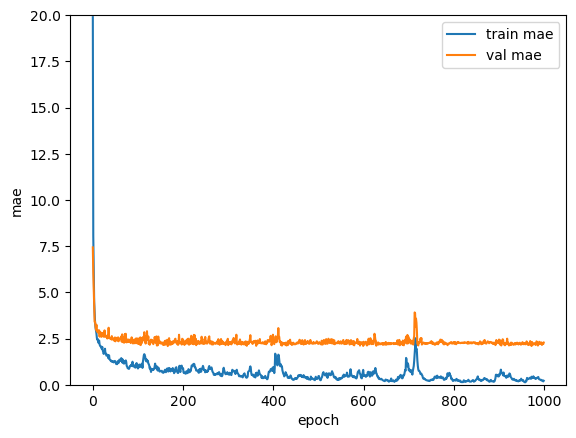

In [15]:
#Plot the learning history
plt.plot(history.history['mae'],
         label='train mae')
plt.plot(history.history['val_mae'],
         label='val mae')
plt.xlabel('epoch')
plt.ylabel('mae')
plt.legend(loc='best')
plt.ylim([0,20])
plt.show()

In [16]:
train_loss, train_mae = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

print(f"Train loss: {train_loss:.3f}")
print(f"Test loss : {test_loss:.3f}")
print(f"Train MAE : {train_mae:.3f}")
print(f"Test MAE  : {test_mae:.3f}")

Train loss: 2.032
Test loss : 13.047
Train MAE : 0.622
Test MAE  : 2.350


In [17]:
#Make prediction
y_pred = model.predict(X_test)
print(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[25.967026 ]
 [35.71601  ]
 [16.218088 ]
 [24.407944 ]
 [18.44619  ]
 [20.42035  ]
 [19.3193   ]
 [14.273898 ]
 [22.97294  ]
 [18.521914 ]
 [23.40588  ]
 [24.959417 ]
 [ 9.550946 ]
 [21.310785 ]
 [18.08112  ]
 [23.724266 ]
 [20.205223 ]
 [12.030572 ]
 [48.52564  ]
 [ 9.822514 ]
 [23.963703 ]
 [26.16881  ]
 [11.8806715]
 [25.920862 ]
 [18.290688 ]
 [17.189842 ]
 [20.204815 ]
 [11.820768 ]
 [21.646557 ]
 [17.898643 ]
 [25.217127 ]
 [23.91938  ]
 [17.607605 ]
 [27.073723 ]
 [15.571578 ]
 [16.699303 ]
 [31.540825 ]
 [18.868555 ]
 [22.848305 ]
 [25.214392 ]
 [17.674667 ]
 [31.049793 ]
 [53.720608 ]
 [19.574112 ]
 [24.034748 ]
 [11.619267 ]
 [15.835678 ]
 [26.034962 ]
 [19.310663 ]
 [24.202091 ]
 [24.79144  ]
 [33.52074  ]
 [15.357504 ]
 [28.891285 ]
 [43.869755 ]
 [22.491909 ]
 [11.644283 ]
 [33.46877  ]
 [24.627213 ]
 [17.440632 ]
 [26.230843 ]
 [35.067154 ]
 [31.283676 ]
 [15.104093 ]
 [22.957666 ]
 [21.601137 ]
 [11.099543 ]
 [24.658266 ]
 [27.83715